# Assignment -18 Q1

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization
# for makin sure matplotlib plots are gennrated in jupyter notebook itself
%matplotlib inline


In [2]:
Airdata = pd.read_excel("Airlines+Data (1).xlsx")
Airdata.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
Airdata.shape

(96, 2)

In [4]:
Airdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


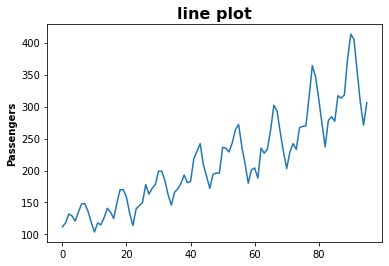

In [5]:
# visualized the overall data in order to the componenets present in data
plt.title("line plot",size = 16,weight="bold")
plt.ylabel("Passengers",size = 10,weight = "bold")
plt.plot(Airdata['Passengers'])

In [6]:
Airdata["month"] = Airdata.Month.dt.strftime("%b")

In [7]:
Airdata

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


In [8]:
data = pd.get_dummies(Airdata["month"])
data

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
Airdata1 = pd.concat([Airdata,data],axis=1)

In [10]:
# find t_squared value and log values
Airdata1["t"] = np.arange(1,97)
Airdata1["t_squared"] = Airdata1["t"]*Airdata1["t"]
Airdata1.columns
Airdata1["log_passengers"] = np.log(Airdata1["Passengers"])

In [11]:
Airdata1

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:>

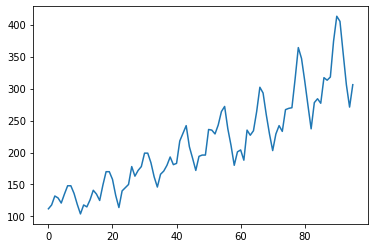

In [12]:
train = Airdata1.head(88)
test = Airdata1.tail(8)
Airdata1.Passengers.plot()

In [13]:
indexed_dataset = Airdata1.set_index(['Month'])
indexed_dataset.head(5)

,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
Month,,,,,,,,,,,,,,,,,
1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [14]:
rolmean = indexed_dataset.rolling(window=12).mean()   #window size 12 denotes 1 Year, giving rolling mean at yearly level
rolstd = indexed_dataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers       Apr       Aug       Dec       Feb       Jan  \
Month                                                                      
1995-01-01         NaN       NaN       NaN       NaN       NaN       NaN   
1995-02-01         NaN       NaN       NaN       NaN       NaN       NaN   
1995-03-01         NaN       NaN       NaN       NaN       NaN       NaN   
1995-04-01         NaN       NaN       NaN       NaN       NaN       NaN   
1995-05-01         NaN       NaN       NaN       NaN       NaN       NaN   
...                ...       ...       ...       ...       ...       ...   
2002-08-01  316.833333  0.083333  0.083333  0.083333  0.083333  0.083333   
2002-09-01  320.416667  0.083333  0.083333  0.083333  0.083333  0.083333   
2002-10-01  323.083333  0.083333  0.083333  0.083333  0.083333  0.083333   
2002-11-01  325.916667  0.083333  0.083333  0.083333  0.083333  0.083333   
2002-12-01  328.250000  0.083333  0.083333  0.083333  0.083333  0.083333   

           

C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\3405202098.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['month'], dtype='object')
  rolmean = indexed_dataset.rolling(window=12).mean()   #window size 12 denotes 1 Year, giving rolling mean at yearly level
C:\Users\DELL\AppData\Local\Temp\ipykernel_12316\3405202098.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['month'], dtype='object')
  rolstd = indexed_dataset.rolling(window=12).std()


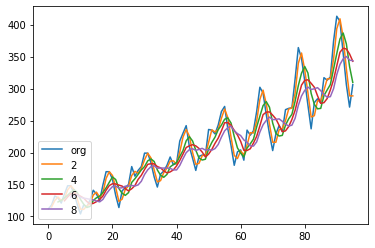

In [15]:
Airdata1.Passengers.plot(label="org")
for i in range(2,10,2):
    Airdata1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)


In [16]:
import statsmodels.formula.api as smf

In [17]:
# LINEAR MODEL 
linear = smf.ols("Passengers~t",data=Airdata1).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test["t"])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
print("Root Mean Square Error : ",rmselin)

Root Mean Square Error :  27.064319949357937


In [18]:
#QUADRITIC MODEL
quad=smf.ols('Passengers~t+t_squared',data=Airdata1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
print("Root Mean Square Error : ",rmsequad)

Root Mean Square Error :  54.40869822000733


In [20]:
#EXPONENTIAL MODEL
expo=smf.ols('log_passengers~t',data=Airdata1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
print("Root Mean Square Error : ",rmseexpo)

Root Mean Square Error :  54.71281342390108


In [21]:
#ADDITIVE SEASONALITY

additive= smf.ols('Passengers~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
print("Root Mean Square Error : ",rmseadd)


Root Mean Square Error :  122.96927017043735


In [22]:
# ADDITIVE SEASONALITY  WITH LINEAR TREND
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
predaddlinear

88    305.125
89    333.125
90    359.875
91    358.125
92    329.875
93    301.750
94    277.000
95    302.625
dtype: float64

In [23]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
print("Root Mean Square Error : ",rmseaddlinear)

Root Mean Square Error :  30.72617217048035


In [24]:
#ADDITIVE SEASONALITY WITH QUADRATIC TRND
addquad=smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
print("Root Mean Square Error : ",rmseaddquad)

Root Mean Square Error :  24.070103714160688


In [25]:
#MULTIPLICATIVE SEASONA;LITY WITH QUADRATIC TREND
mulsea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
print("Root Mean Square Error : ",rmsemul)

Root Mean Square Error :  134.1197147580868


In [26]:
# MULTIPLICATIVE SEASONALITY WITH QUADRATIC TREND
mul_quad= smf.ols('log_passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
print("Root Mean Square Error : ",rmse_mul_quad)

Root Mean Square Error :  12.157969820537568


In [27]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsequad])}


In [28]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,12.157970
1,rmseadd,122.969270
2,rmseaddlinear,30.726172
3,rmseaddquad,24.070104
4,rmseexpo,54.712813
5,rmselin,27.064320
6,rmsemul,134.119715
7,rmsequad,54.408698


In [29]:
# IMPORT DATASET FR MAKING MODEL WITH RMES

data_predict = pd.read_excel("Airlines+Data (1).xlsx")

In [31]:
# FINAL MODEL WITH LEAST RMSE VALUE 

final_pred = smf.ols('log_passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airdata1).fit()


In [32]:
pred_new = pd.Series(final_pred.predict(Airdata1))

In [33]:
pred_new

0     4.679610
1     4.690898
2     4.834840
3     4.802751
4     4.796991
        ...   
91    5.968039
92    5.857037
93    5.726162
94    5.594949
95    5.730733
Length: 96, dtype: float64